In [117]:
import pandas as pd
import requests
from io import BytesIO
import xgboost as xgb
from category_encoders import TargetEncoder
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score,f1_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from IPython.display import display
from sklearn import metrics
import advertools as adv
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
import plotly.express as px
import pickle
from xgboost import plot_importance
import plotly.graph_objects as go
import warnings
import optuna
from fitter import Fitter
warnings.filterwarnings('ignore')
import matplotlib. pyplot as plt 

In [118]:
df = pd.read_csv("/Users/birsenbas/Desktop/Kodluyoruz/finalProject/2019-2020-ismek-kesin-kaytl-kursiyer-verileri.csv", encoding="ISO-8859-1", error_bad_lines=False, delimiter=";")

In [90]:
df.head(10)

,Donem,Egitim Durumu,Engel Durumu,Calisma Durumu,Alan,Program,Hak Edilen Belge Tipi,Kurs Merkezi,Kurs Merkezi Ýlcesi,Tercih Sebebi,Yas Araligi
0,2019-2020,Lisans,Engeli Olmayan,Ogrenci,Dil Egitimleri,Ingilizce A2 Seviyesi,Hak Etmedi,Dil Okulu,Sisli,"Meslek Edinmek, Meslegimde Ýlerlemek",20-30 Yas Arasi
1,2019-2020,Lise,Engeli Olmayan,Calismiyor,Spor,Fitness (Kadin),Ismek Sertifika,Silivri Spor Egitim Merkezi,Silivri,"Sanat,Muzik,Spor Vb. Yeteneklerimi Gelistirmek",20-30 Yas Arasi
2,2019-2020,Lisans,Engeli Olmayan,Ogrenci,Dil Egitimleri,Ingilizce A1 Seviyesi,Meb Sertifika,Tuzla Yayla Mahallesi,Tuzla,"Meslek Edinmek, Meslegimde Ýlerlemek",30-40 Yas Arasi
3,2019-2020,Lisans,Engeli Olmayan,Ogrenci,Spor,Crunch (Kadin),Hak Etmedi,Atasehir Kayisdagi,Atasehir,"Sanat,Muzik,Spor Vb. Yeteneklerimi Gelistirmek",20 Yas Alti
4,2019-2020,Lisans,Engeli Olmayan,Ogrenci,Spor,Stretching (Kadin),Hak Etmedi,Atasehir Kayisdagi,Atasehir,"Sanat,Muzik,Spor Vb. Yeteneklerimi Gelistirmek",20 Yas Alti
5,2019-2020,Lisans,Engeli Olmayan,Ogrenci,Spor,Stretching (Kadin),Ismek Sertifika,Atasehir Kayisdagi,Atasehir,"Sanat,Muzik,Spor Vb. Yeteneklerimi Gelistirmek",20 Yas Alti
6,2019-2020,Lisans,Engeli Olmayan,Ogrenci,Spor,Crunch (Kadin),Ismek Sertifika,Atasehir Kayisdagi,Atasehir,"Sanat,Muzik,Spor Vb. Yeteneklerimi Gelistirmek",20 Yas Alti
7,2019-2020,Lise,Engeli Olmayan,Calismiyor,Moda Tasarimi Ve Tekstil Teknolojisi,Giyim Uretiminde Temel Islemler,Hak Etmedi,Bagcilar Kirazli,Bagcilar,"Meslek Edinmek, Meslegimde Ýlerlemek",20-30 Yas Arasi
8,2019-2020,Lisans,Engeli Olmayan,Calismiyor,Gastronomi Ve Mutfak Sanatlari,Hamur Teknikleri,Hak Etmedi,K.Cekmece Halkali Toplu Konutlar,Kucukcekmece,Uretim Yaparak Gelir Elde Etmek,40-50 Yas Arasi
9,2019-2020,Lisans,Engeli Olmayan,Calismiyor,Gastronomi Ve Mutfak Sanatlari,Pastaci Ciragi,Meb Sertifika,K.Cekmece Halkali Toplu Konutlar,Kucukcekmece,Uretim Yaparak Gelir Elde Etmek,40-50 Yas Arasi


In [119]:
df = df.drop(["Donem", "Engel Durumu", "Program"], axis=1)

In [92]:
df

,Egitim Durumu,Calisma Durumu,Alan,Hak Edilen Belge Tipi,Kurs Merkezi,Kurs Merkezi Ýlcesi,Tercih Sebebi,Yas Araligi
0,Lisans,Ogrenci,Dil Egitimleri,Hak Etmedi,Dil Okulu,Sisli,"Meslek Edinmek, Meslegimde Ýlerlemek",20-30 Yas Arasi
1,Lise,Calismiyor,Spor,Ismek Sertifika,Silivri Spor Egitim Merkezi,Silivri,"Sanat,Muzik,Spor Vb. Yeteneklerimi Gelistirmek",20-30 Yas Arasi
2,Lisans,Ogrenci,Dil Egitimleri,Meb Sertifika,Tuzla Yayla Mahallesi,Tuzla,"Meslek Edinmek, Meslegimde Ýlerlemek",30-40 Yas Arasi
3,Lisans,Ogrenci,Spor,Hak Etmedi,Atasehir Kayisdagi,Atasehir,"Sanat,Muzik,Spor Vb. Yeteneklerimi Gelistirmek",20 Yas Alti
4,Lisans,Ogrenci,Spor,Hak Etmedi,Atasehir Kayisdagi,Atasehir,"Sanat,Muzik,Spor Vb. Yeteneklerimi Gelistirmek",20 Yas Alti
...,...,...,...,...,...,...,...,...
216760,Lisans,Calismiyor,Bilisim Teknolojileri,Hak Etmedi,Uzaktan Egitim,Esenler,Sosyal Cevre Edinmek,40-50 Yas Arasi
216761,Lisans,Ogrenci,Grafik Ve Teknik Tasarim,Ismek Sertifika,Uzaktan Egitim,Esenler,"Meslek Edinmek, Meslegimde Ýlerlemek",20-30 Yas Arasi
216762,Lisans,Ogrenci,Bilisim Teknolojileri,Hak Etmedi,Uzaktan Egitim,Esenler,"Meslek Edinmek, Meslegimde Ýlerlemek",20-30 Yas Arasi
216763,Lisans,Ogrenci,Bilisim Teknolojileri,Hak Etmedi,Uzaktan Egitim,Esenler,"Meslek Edinmek, Meslegimde Ýlerlemek",20-30 Yas Arasi


# create new features

In [8]:
#def Uzaktan(df):
    #if df["Kurs Merkezi"] == "Uzaktan Egitim":
     #   return 1
    #else:
     #   return 0
    
#df["Uzaktan"] = df.apply(lambda df:Uzaktan(df), axis=1)

In [120]:
def Meslek(df):
    if df["Tercih Sebebi"] == "Meslek Edinmek, Meslegimde Ýlerlemek" or df["Tercih Sebebi"] == "Uretim Yaparak Gelir Elde Etmek" or df["Tercih Sebebi"] == "Yeni Bir Meslek Edinmek":
        return 1
    else:
        return 0
    
df["Meslek"] = df.apply(lambda df:Meslek(df), axis=1)

In [121]:
def Calisan(df):
    if df["Calisma Durumu"] == "Calisiyor":
        return 1
    else:
        return 0
    
df["Calisan"] = df.apply(lambda df:Calisan(df), axis=1)

In [122]:
def GencKursiyer(df):
    if df["Yas Araligi"] == "20-30 Yas Arasi":
        return 1
    else:
        return 0
    
df["GencKursiyer"] = df.apply(lambda df:GencKursiyer(df), axis=1)

In [123]:
def Haketme(df):
    if df["Hak Edilen Belge Tipi"] == "Ismek Sertifika" or df["Hak Edilen Belge Tipi"] == "Meb Sertifika":
        return 1
    else:
        return 0
    
df["Haketme"] = df.apply(lambda df:Haketme(df), axis=1)

In [124]:
#üniversiteye gidenler ve yaşı genç olanlar

def UniversandGenc(df):
    if df["Egitim Durumu"] == "Üniversite" or df["Yas Araligi"] == "20-30 Yas Arasi":
        return 1
    else:
        return 0
    
df["UniversandGenc"] = df.apply(lambda df:UniversandGenc(df), axis=1)

In [15]:
#uzaktan ve yaşı genç olanlar

#def UzaktandOgrenci(df):
    if df["Kurs Merkezi"] == "Uzaktan" or df["Yas Araligi"] == "20-30 Yas Arasi":
        return 1
    else:
        return 0
    
df["UzaktanOgrenci"] = df.apply(lambda df:UzaktandOgrenci(df), axis=1)

In [16]:
#uzaktan ve çalışıyor olanlar

#def UzaktanCalisiyor(df):
    if df["Kurs Merkezi"] == "Uzaktan" or df["Calisma Durumu"] == "Calisiyor":
        return 1
    else:
        return 0
    
df["UzaktanCalisiyor"] = df.apply(lambda df:UzaktanCalisiyor(df), axis=1)

In [103]:
df

,Egitim Durumu,Calisma Durumu,Alan,Hak Edilen Belge Tipi,Kurs Merkezi,Kurs Merkezi Ýlcesi,Tercih Sebebi,Yas Araligi,Meslek,Calisan,GencKursiyer,Haketme,UniversandGenc
0,Lisans,Ogrenci,Dil Egitimleri,Hak Etmedi,Dil Okulu,Sisli,"Meslek Edinmek, Meslegimde Ýlerlemek",20-30 Yas Arasi,1,0,1,0,1
1,Lise,Calismiyor,Spor,Ismek Sertifika,Silivri Spor Egitim Merkezi,Silivri,"Sanat,Muzik,Spor Vb. Yeteneklerimi Gelistirmek",20-30 Yas Arasi,0,0,1,1,1
2,Lisans,Ogrenci,Dil Egitimleri,Meb Sertifika,Tuzla Yayla Mahallesi,Tuzla,"Meslek Edinmek, Meslegimde Ýlerlemek",30-40 Yas Arasi,1,0,0,1,0
3,Lisans,Ogrenci,Spor,Hak Etmedi,Atasehir Kayisdagi,Atasehir,"Sanat,Muzik,Spor Vb. Yeteneklerimi Gelistirmek",20 Yas Alti,0,0,0,0,0
4,Lisans,Ogrenci,Spor,Hak Etmedi,Atasehir Kayisdagi,Atasehir,"Sanat,Muzik,Spor Vb. Yeteneklerimi Gelistirmek",20 Yas Alti,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
216760,Lisans,Calismiyor,Bilisim Teknolojileri,Hak Etmedi,Uzaktan Egitim,Esenler,Sosyal Cevre Edinmek,40-50 Yas Arasi,0,0,0,0,0
216761,Lisans,Ogrenci,Grafik Ve Teknik Tasarim,Ismek Sertifika,Uzaktan Egitim,Esenler,"Meslek Edinmek, Meslegimde Ýlerlemek",20-30 Yas Arasi,1,0,1,1,1
216762,Lisans,Ogrenci,Bilisim Teknolojileri,Hak Etmedi,Uzaktan Egitim,Esenler,"Meslek Edinmek, Meslegimde Ýlerlemek",20-30 Yas Arasi,1,0,1,0,1
216763,Lisans,Ogrenci,Bilisim Teknolojileri,Hak Etmedi,Uzaktan Egitim,Esenler,"Meslek Edinmek, Meslegimde Ýlerlemek",20-30 Yas Arasi,1,0,1,0,1


In [125]:
#öncelikle Kurs Merkezi uzaktan olanları dropluyorum, bu nedenle feature eng. uzaktan ile ilgili olan kolonları eklemedim

df.drop(df[df["Kurs Merkezi"] == "Uzaktan Egitim"].index, inplace=True)

In [126]:
df["Alan"].value_counts()

Spor                                    23254
Dil Egitimleri                          14271
Kisisel Gelisim Ve Egitim                8891
Orgu Ve Ýsleme Sanatlari                 8618
Bilisim Teknolojileri                    8345
Moda Tasarimi Ve Tekstil Teknolojisi     6097
Sanat Ve Tasarim                         5652
El Sanatlari Teknolojisi                 5347
Gastronomi Ve Mutfak Sanatlari           5213
Yonetim Ve Hizmet                        3950
Tekstil Tasarimi                         3355
Guzellik Ve Sac Bakim Hizmetleri         2891
Muzik                                    2826
Susleme Sanatlari                        2636
Cocuk Gelisimi Ve Egitimi                1986
Kuyumculuk Ve Taki Tasarimi              1387
Ahsap Tasarimi Ve Teknolojileri          1363
Grafik Ve Teknik Tasarim                 1200
Muhasebe Ve Finans                       1164
Ziraat                                    866
Sahne Ve Gosteri Sanatlari                845
Muzik Ve Gosteri Sanatlari        

In [127]:
#şimdi alanlar arasında bir gruplama yapacağım(özellikle sanat ve tasarımın ortak olduğu bir çok alan var)

df.replace("Orgu Ve Ýsleme Sanatlari", "Sanat Ve Tasarim", inplace=True)
df.replace("Moda Tasarimi Ve Tekstil Teknolojisi", "Sanat Ve Tasarim", inplace=True)
df.replace("El Sanatlari Teknolojisi", "Sanat Ve Tasarim", inplace=True)
df.replace("Kuyumculuk Ve Taki Tasarimi", "Sanat Ve Tasarim", inplace=True)
df.replace("Ahsap Tasarimi Ve Teknolojileri", "Sanat Ve Tasarim", inplace=True)
df.replace("Sahne Ve Gosteri Sanatlari", "Sanat Ve Tasarim", inplace=True)
df.replace("Muzik Ve Gosteri Sanatlari", "Sanat Ve Tasarim", inplace=True)
df.replace("Muzik Ve Gosteri Sanatlari", "Sanat Ve Tasarim", inplace=True)
df.replace("Muzik", "Sanat Ve Tasarim", inplace=True)
df.replace("Grafik Ve Teknik Tasarim", "Sanat Ve Tasarim", inplace=True)
df.replace("Yabanci Diller", "Dil Egitimleri", inplace=True)

In [128]:
df["Alan"].value_counts()

Sanat Ve Tasarim                    33772
Spor                                23254
Dil Egitimleri                      14427
Kisisel Gelisim Ve Egitim            8891
Bilisim Teknolojileri                8345
Gastronomi Ve Mutfak Sanatlari       5213
Yonetim Ve Hizmet                    3950
Tekstil Tasarimi                     3355
Guzellik Ve Sac Bakim Hizmetleri     2891
Susleme Sanatlari                    2636
Cocuk Gelisimi Ve Egitimi            1986
Muhasebe Ve Finans                   1164
Ziraat                                866
Giyim Uretim Teknolojileri            214
Robotik Ve Ýnovasyon                  187
Grafik Ve Fotograf                    106
Turizm Ve Otelcilik                    75
Gida Teknolojisi                       72
Yiyecek Ýcecek Hizmetleri              65
Kuyumculuk Teknolojisi                 50
Tekstil Teknolojisi                    30
Seramik Ve Cam                         15
Mesleki Teknik Egitimler               14
Name: Alan, dtype: int64

In [129]:
#bunlar arasında en fazla tercih edilen ilk 4 alanı seçip, modelliyorum

df1 = df.loc[df['Alan'].isin(["Sanat Ve Tasarim", "Spor", "Dil Egitimleri", "Kisisel Gelisim Ve Egitim"])]

df1.loc[df["Alan"] == "Sanat Ve Tasarim", "Alan"] = 0
df1.loc[df["Alan"] == "Spor", "Alan"] = 1
df1.loc[df["Alan"] == "Dil Egitimleri", "Alan"] = 2
df1.loc[df["Alan"] == "Kisisel Gelisim Ve Egitim", "Alan"] = 3

In [130]:
df1

,Egitim Durumu,Calisma Durumu,Alan,Hak Edilen Belge Tipi,Kurs Merkezi,Kurs Merkezi Ýlcesi,Tercih Sebebi,Yas Araligi,Meslek,Calisan,GencKursiyer,Haketme,UniversandGenc
0,Lisans,Ogrenci,2,Hak Etmedi,Dil Okulu,Sisli,"Meslek Edinmek, Meslegimde Ýlerlemek",20-30 Yas Arasi,1,0,1,0,1
1,Lise,Calismiyor,1,Ismek Sertifika,Silivri Spor Egitim Merkezi,Silivri,"Sanat,Muzik,Spor Vb. Yeteneklerimi Gelistirmek",20-30 Yas Arasi,0,0,1,1,1
2,Lisans,Ogrenci,2,Meb Sertifika,Tuzla Yayla Mahallesi,Tuzla,"Meslek Edinmek, Meslegimde Ýlerlemek",30-40 Yas Arasi,1,0,0,1,0
3,Lisans,Ogrenci,1,Hak Etmedi,Atasehir Kayisdagi,Atasehir,"Sanat,Muzik,Spor Vb. Yeteneklerimi Gelistirmek",20 Yas Alti,0,0,0,0,0
4,Lisans,Ogrenci,1,Hak Etmedi,Atasehir Kayisdagi,Atasehir,"Sanat,Muzik,Spor Vb. Yeteneklerimi Gelistirmek",20 Yas Alti,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
190785,Ilkokul,Bos,0,Ismek Sertifika,Bakirkoy Ruh Ve Sinir Hastaliklari Hst.,Bakirkoy,Uretim Yaparak Gelir Elde Etmek,20 Yas Alti,1,0,0,1,0
190786,Ilkokul,Bos,0,Ismek Sertifika,Bakirkoy Ruh Ve Sinir Hastaliklari Hst.,Bakirkoy,Uretim Yaparak Gelir Elde Etmek,20 Yas Alti,1,0,0,1,0
190787,Ilkokul,Bos,0,Ismek Sertifika,Bakirkoy Ruh Ve Sinir Hastaliklari Hst.,Bakirkoy,Uretim Yaparak Gelir Elde Etmek,20 Yas Alti,1,0,0,1,0
190788,Ilkokul,Bos,0,Ismek Sertifika,Sancaktepe Toplum Ve Ruh Sagligi Merkezi,Sancaktepe,Uretim Yaparak Gelir Elde Etmek,20 Yas Alti,1,0,0,1,0


# model

In [131]:
from sklearn.preprocessing import LabelEncoder 
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)
    
cat_cols = df1.select_dtypes(include=["object"]).columns
df1 = MultiColumnLabelEncoder(columns = cat_cols).fit_transform(df1)

In [132]:
X = df1.drop(["Alan"],axis=1)
y = df1.Alan

X_train , X_test , y_train , y_test = train_test_split(X,y , test_size = 0.2 , random_state = 104, stratify=df1.Alan)

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      6755
           1       0.98      0.98      0.98      4651
           2       0.75      0.77      0.76      2885
           3       0.70      0.46      0.56      1778

    accuracy                           0.86     16069
   macro avg       0.82      0.78      0.79     16069
weighted avg       0.85      0.86      0.85     16069



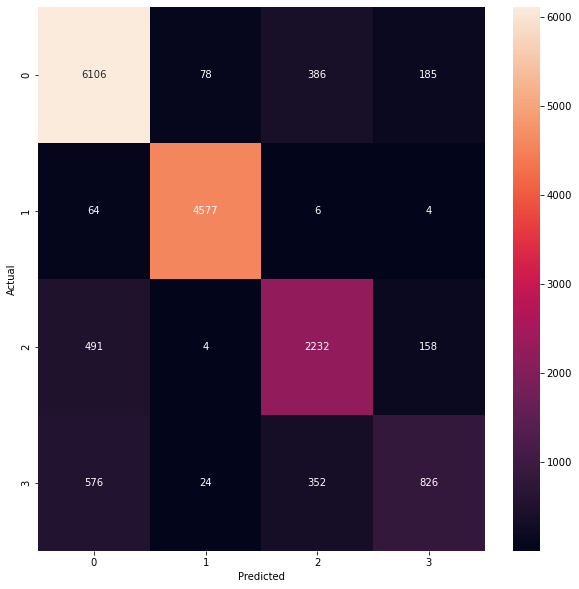

In [133]:
xgb_cl = xgb.XGBClassifier()
xgb_cl.fit(X_train,y_train)

pred = xgb_cl.predict(X_test)
conf_mat = confusion_matrix(y_test, pred)
print(metrics.classification_report(y_test,pred))
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

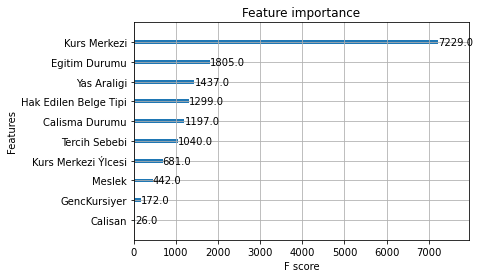

In [134]:
plot_importance(xgb_cl)

sonuç: model sanat ve tasarım, spor, dil eğitimi alanlarını iyi modellerken kişisel gelişim alanını iyi tahminleyemiyor. bu nedenle modeli 3 alanı tahminletecek şekilde kurabiliriz.